Chapter 08

# 条件概率，离散随机变量
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码实现了对鸢尾花数据集中花萼长度（sepal length）和花萼宽度（sepal width）的频率和概率分布的分析，计算边际分布、条件分布、期望和方差等统计量。具体步骤包括：

1. **数据预处理和频率矩阵计算**：将数据离散化，并计算花萼长度和宽度的频率和概率分布矩阵。
   
2. **边际分布**：分别计算花萼长度和宽度的边际概率分布 $p(X_1)$ 和 $p(X_2)$。

3. **条件分布和条件期望**：求解在给定花萼长度或宽度条件下的条件分布（例如 $p(X_2 | X_1)$），并计算条件期望 $E(X_2 | X_1)$ 和 $E(X_1 | X_2)$。

4. **条件方差和标准差**：计算条件方差 $var(X_2 | X_1)$ 和 $var(X_1 | X_2)$ 以及相应的标准差。

5. **总期望定律和总方差定律**：验证条件期望和条件方差的结果符合总期望和总方差定律，分别为：
   
   $$ E(X_2) = \sum_{x_1} E(X_2 | X_1 = x_1) \cdot p(X_1 = x_1) $$
   
   $$ var(X_2) = E(var(X_2 | X_1)) + var(E(X_2 | X_1)) $$

6. **类别条件分析**：针对不同的鸢尾花类别，计算其花萼长度和宽度的条件分布、期望、方差和标准差。

该代码通过统计分析对鸢尾花数据中的变量关系进行深度探索，并将其以可视化图形的形式展示，从而帮助理解数据的分布特性和变量之间的相关性。

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris
pd.options.mode.chained_assignment = None  # 忽略警告

## 加载鸢尾花数据集

In [2]:
# X_df = sns.load_dataset("iris")
# X_df.to_pickle('X_df.pkl')
X_df = pd.read_pickle('X_df.pkl')

## 自定义函数定义

In [3]:
def heatmap_sum(data, i_array, j_array, title, vmin, vmax, cmap):
    """绘制热力图，显示矩阵数据的分布情况"""
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(data, cmap=cmap,
                     cbar_kws={"orientation": "horizontal"},
                     yticklabels=i_array, xticklabels=j_array,
                     ax=ax, annot=True,
                     linewidths=0.25, linecolor='grey',
                     vmin=vmin, vmax=vmax)
    ax.set_xlabel('Sepal length')  # 设置X轴标签
    ax.set_ylabel('Sepal width')  # 设置Y轴标签
    ax.set_aspect("equal")
    plt.title(title)
    plt.yticks(rotation=0) 

## 数据预处理

In [4]:
X_df.sepal_length = round(X_df.sepal_length * 2) / 2  # 四舍五入
X_df.sepal_width = round(X_df.sepal_width * 2) / 2  # 四舍五入

In [5]:
sepal_length_array = np.sort(X_df.sepal_length.unique())  # 排序花萼长度
sepal_width_array = -np.sort(-X_df.sepal_width.unique())  # 逆序花萼宽度

In [6]:
X_df_12 = X_df[['sepal_length', 'sepal_width']]
X_df_12['count'] = 1  # 添加计数列

In [7]:
frequency_matrix = X_df_12.groupby(['sepal_length', 'sepal_width']).count().unstack(level=0)  # 计算频数矩阵
frequency_matrix.columns = frequency_matrix.columns.droplevel(0)
frequency_matrix = frequency_matrix.fillna(0).iloc[::-1]

In [8]:
probability_matrix = frequency_matrix / 150  # 概率矩阵
probability_matrix_ = probability_matrix.to_numpy()

In [9]:
X1_array = np.sort(X_df.sepal_length.unique()).reshape(1, -1)
X2_array = np.sort(X_df.sepal_width.unique())[::-1].reshape(1, -1)

## 边际分布

In [10]:
marginal_X1 = probability_matrix.sum(axis=0).to_numpy().reshape((1, -1))
marginal_X2 = probability_matrix.sum(axis=1).to_numpy().reshape((-1, 1))

## 条件分布：X2给定X1的条件概率

In [11]:
conditional_X2_given_X1_matrix = probability_matrix_ / (np.ones((6, 1)) @ np.array([probability_matrix_.sum(axis=0)]))

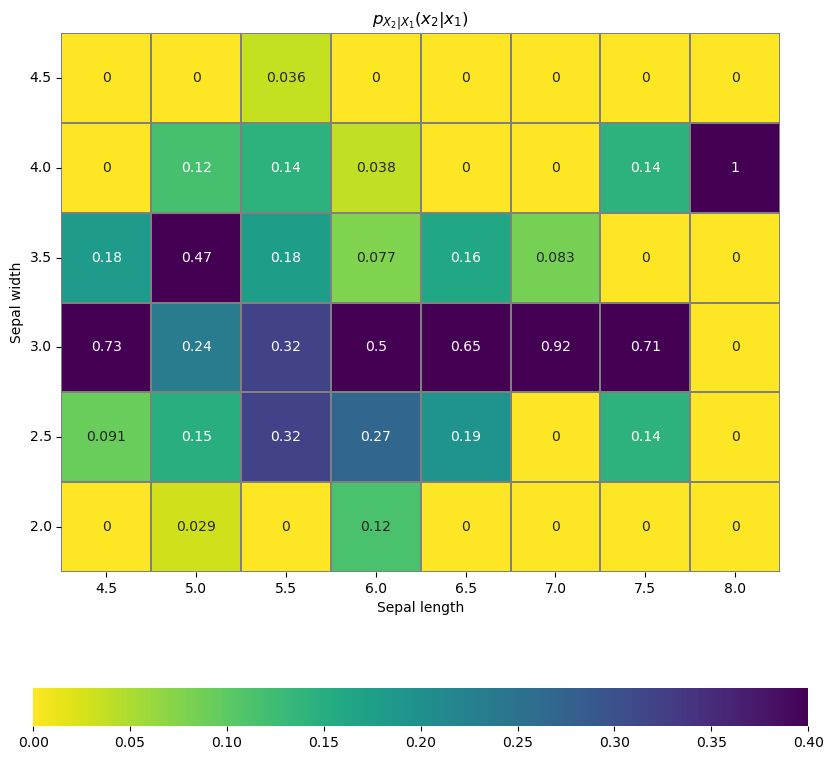

In [12]:
title = '$p_{X_2 | X_1}(x_2 | x_1)$'
heatmap_sum(conditional_X2_given_X1_matrix, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r')

## 条件期望，X2给定X1

In [13]:
E_X2_given_X1 = X2_array @ conditional_X2_given_X1_matrix  # 条件期望计算

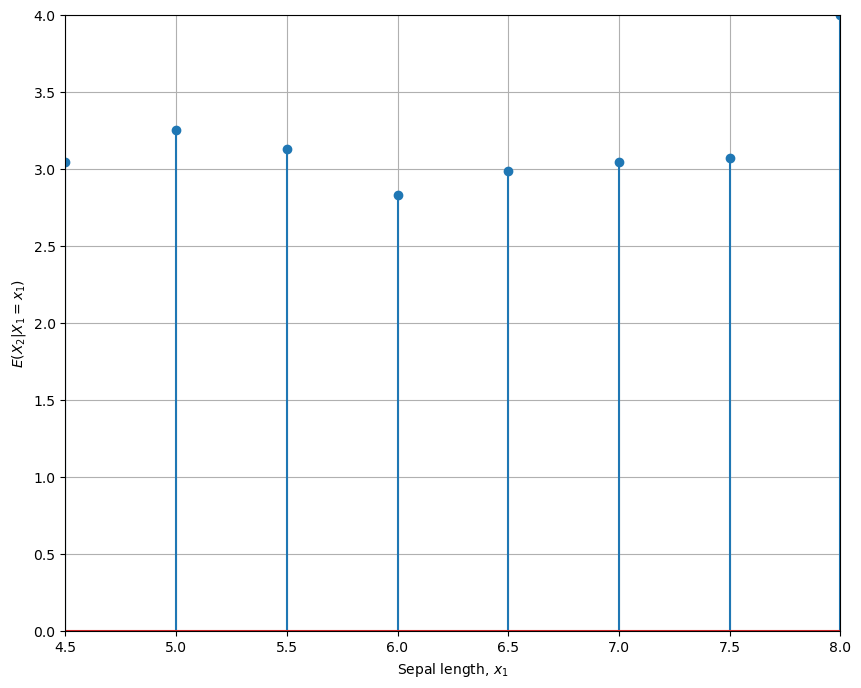

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.stem(X1_array.T, E_X2_given_X1.T) # , use_line_collection=True
plt.xlabel('Sepal length, $x_1$')
plt.ylabel('$E(X_2 | X_1 = x_1)$')
plt.grid()
plt.xlim(4.5, 8.0)
plt.ylim(0, 4)
plt.show()

## 总期望定律

In [15]:
E_X2 = E_X2_given_X1 @ marginal_X1.T  # X2的总期望

In [16]:
E_X2_ = X_df_12['sepal_width'].mean()  # 检验总期望计算结果

## 条件方差，X2给定X1

In [17]:
E_X2_sq_given_X1 = (X2_array**2)@conditional_X2_given_X1_matrix

In [18]:
var_X2_given_X1 = E_X2_sq_given_X1 - E_X2_given_X1**2  # 计算条件方差

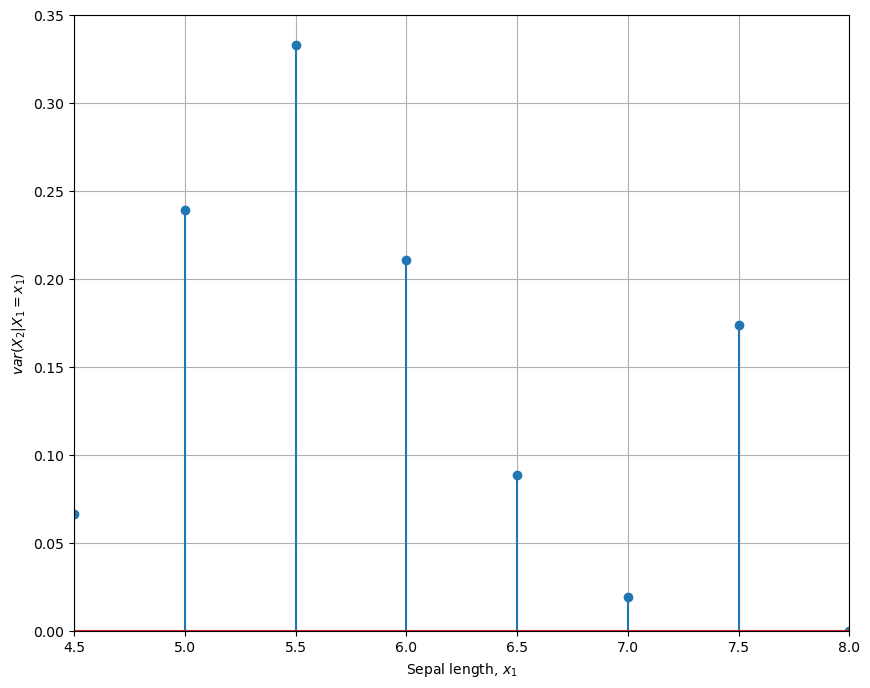

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.stem(X1_array.T, var_X2_given_X1.T) # , use_line_collection=True
plt.xlabel('Sepal length, $x_1$')
plt.ylabel('$var(X_2 | X_1 = x_1)$')
plt.grid()
plt.xlim(4.5, 8.0)
plt.ylim(0, 0.35)
plt.show()

## 条件标准差，X2给定X1

In [20]:
std_X2_given_X1 = np.sqrt(var_X2_given_X1)  # 计算条件标准差

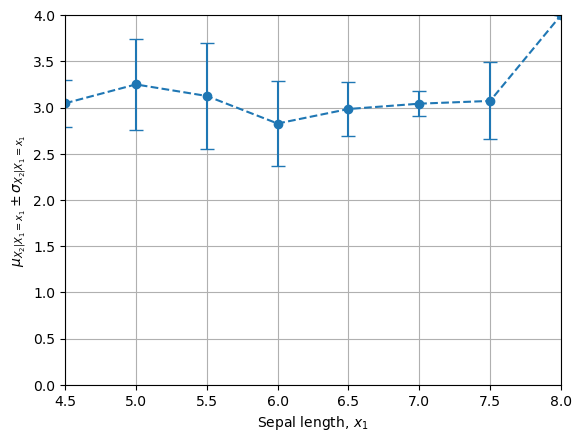

In [21]:
fig, ax = plt.subplots()
ax.errorbar(X1_array[0], E_X2_given_X1[0],
            yerr=std_X2_given_X1[0],
            capsize=5,
            fmt='--o')
plt.xlabel(r'Sepal length, $x_1$')
plt.ylabel(r'$\mu_{X_2 | X_1 = x_1} \pm \sigma_{X_2 | X_1 = x_1} $')
plt.grid()
plt.xlim(4.5, 8.0)
plt.ylim(0, 4)
plt.show()

## 条件概率：X1给定X2

In [22]:
conditional_X1_given_X2_matrix = probability_matrix_ / (probability_matrix_.sum(axis=1).reshape(-1, 1) @ np.ones((1, 8)))

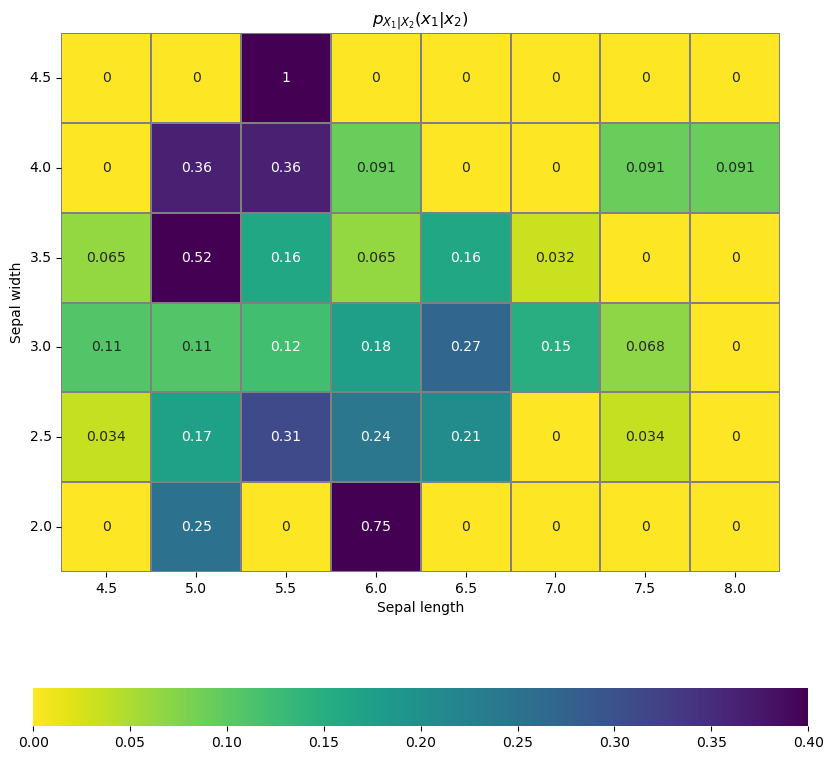

In [23]:
title = '$p_{X_1 | X_2}(x_1 | x_2)$'
heatmap_sum(conditional_X1_given_X2_matrix, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r')

## 条件期望，X1给定X2

In [24]:
E_X1_given_X2 = conditional_X1_given_X2_matrix @ X1_array.T  # 计算条件期望

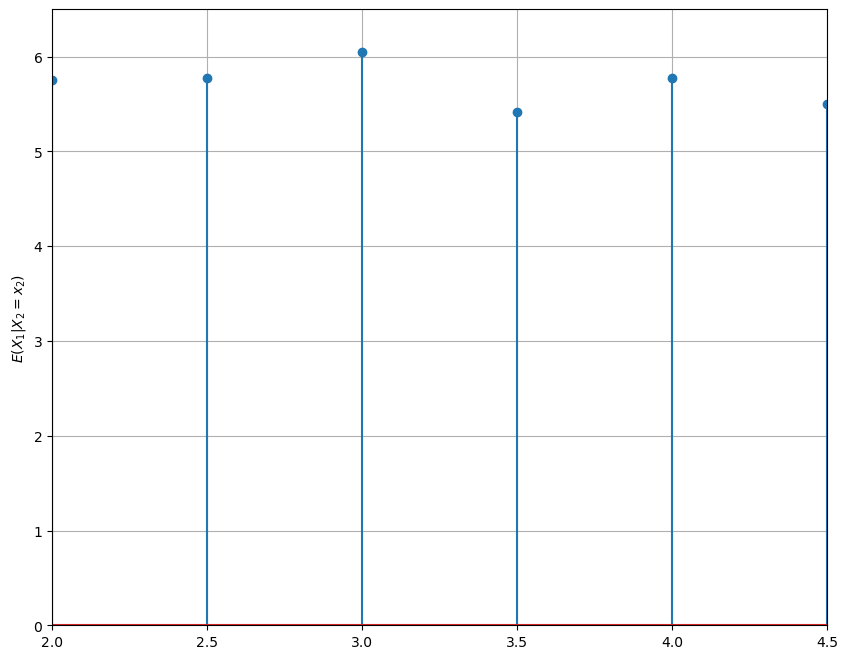

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.stem(X2_array.T, E_X1_given_X2) #, use_line_collection=True
plt.ylabel('$E(X_1 | X_2 = x_2)$')
plt.grid()
plt.xlim(2, 4.5)
plt.ylim(0, 6.5)
plt.show()

## 条件方差，X1给定X2

In [26]:
E_X1_sq_given_X2 = conditional_X1_given_X2_matrix @ (X1_array**2).T

In [27]:
var_X1_given_X2 = E_X1_sq_given_X2 - E_X1_given_X2**2  # 条件方差计算

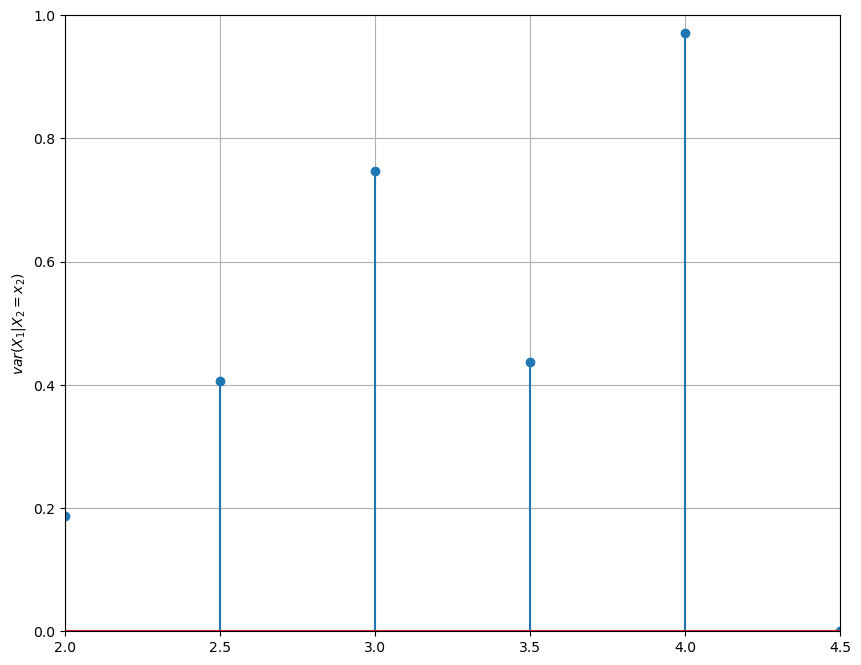

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.stem(X2_array.T, var_X1_given_X2) #, use_line_collection=True
plt.ylabel('$var(X_1 | X_2 = x_2)$')
plt.grid()
plt.xlim(2, 4.5)
plt.ylim(0, 1)
plt.show()

## 条件标准差，X1给定X2

In [29]:
std_X1_given_X2 = np.sqrt(var_X1_given_X2)  # 计算条件标准差

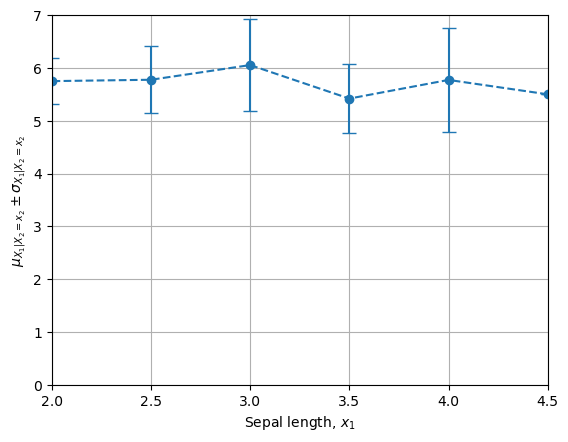

In [30]:
fig, ax = plt.subplots()
ax.errorbar(X2_array[0], E_X1_given_X2.T[0],
            yerr=std_X1_given_X2.T[0],
            capsize=5,
            fmt='--o')
plt.xlabel(r'Sepal length, $x_1$')
plt.ylabel(r'$\mu_{X_1 | X_2 = x_2} \pm \sigma_{X_1 | X_2 = x_2} $')
plt.grid()
plt.xlim(2, 4.5)
plt.ylim(0, 7)
plt.show()

## 条件分析：以鸢尾花种类为条件

In [31]:
Y_array = ['setosa', 'versicolor', 'virginica']  # 鸢尾花种类

Iris class label:
setosa
E_X1_given_Y: [[5.01]]
E_X1_sq_given_Y: [[25.225]]
var_X1_given_Y: [[0.1249]]
std_X1_given_Y: [[0.35341194]]
E_X2_given_Y: [[3.43]]
E_X2_sq_given_Y: [[11.925]]
var_X2_given_Y: [[0.1601]]
std_X2_given_Y: [[0.40012498]]
Iris class label:
versicolor
E_X1_given_Y: [[5.91]]
E_X1_sq_given_Y: [[35.215]]
var_X1_given_Y: [[0.2869]]
std_X1_given_Y: [[0.53563047]]
E_X2_given_Y: [[2.78]]
E_X2_sq_given_Y: [[7.84]]
var_X2_given_Y: [[0.1116]]
std_X2_given_Y: [[0.33406586]]
Iris class label:
virginica
E_X1_given_Y: [[6.59]]
E_X1_sq_given_Y: [[43.785]]
var_X1_given_Y: [[0.3569]]
std_X1_given_Y: [[0.59741108]]
E_X2_given_Y: [[2.98]]
E_X2_sq_given_Y: [[9.02]]
var_X2_given_Y: [[0.1396]]
std_X2_given_Y: [[0.37363083]]


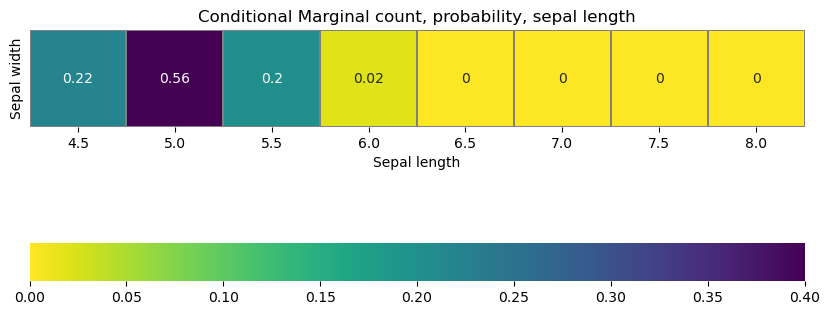

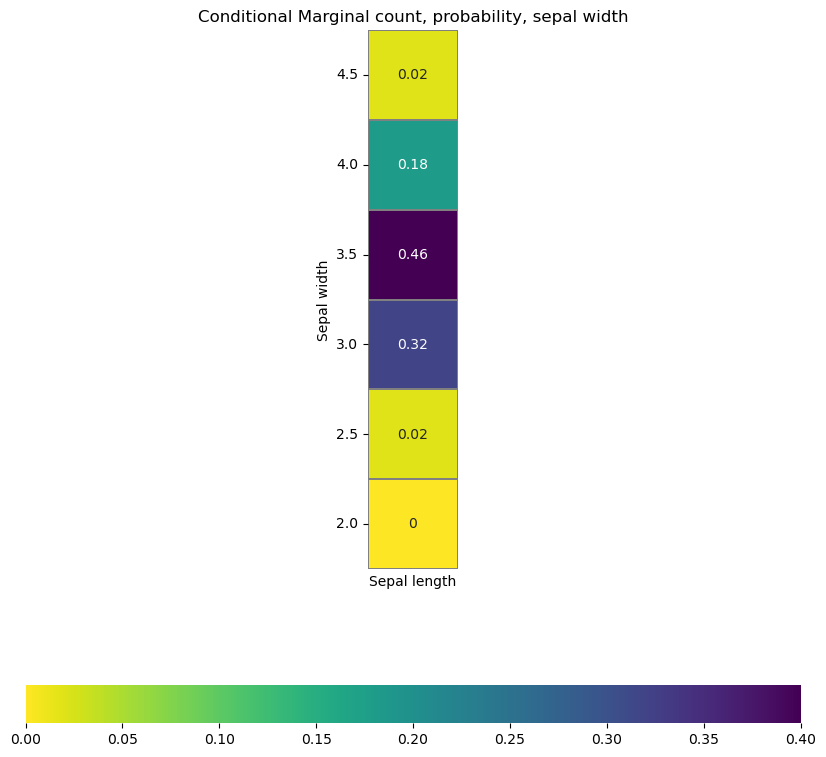

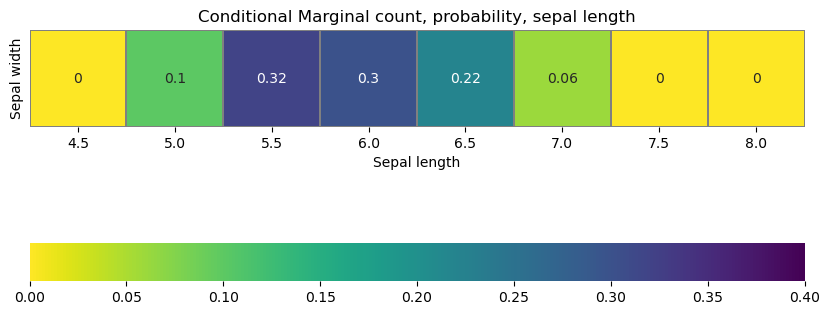

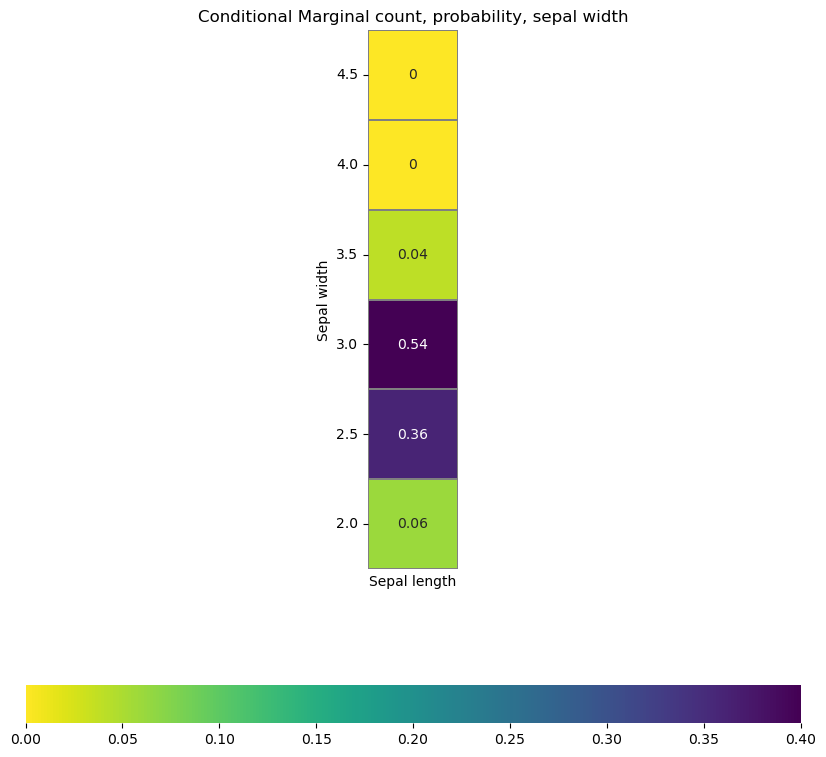

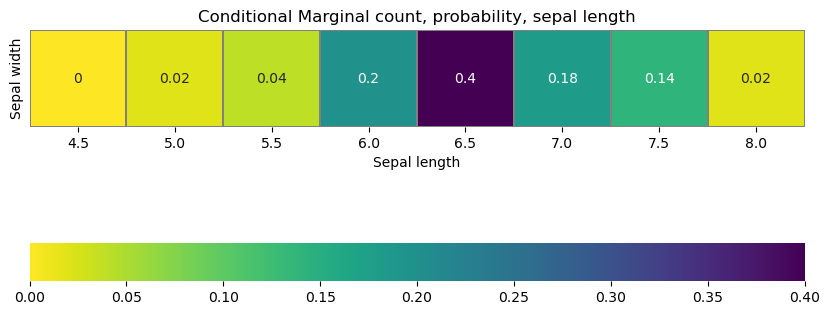

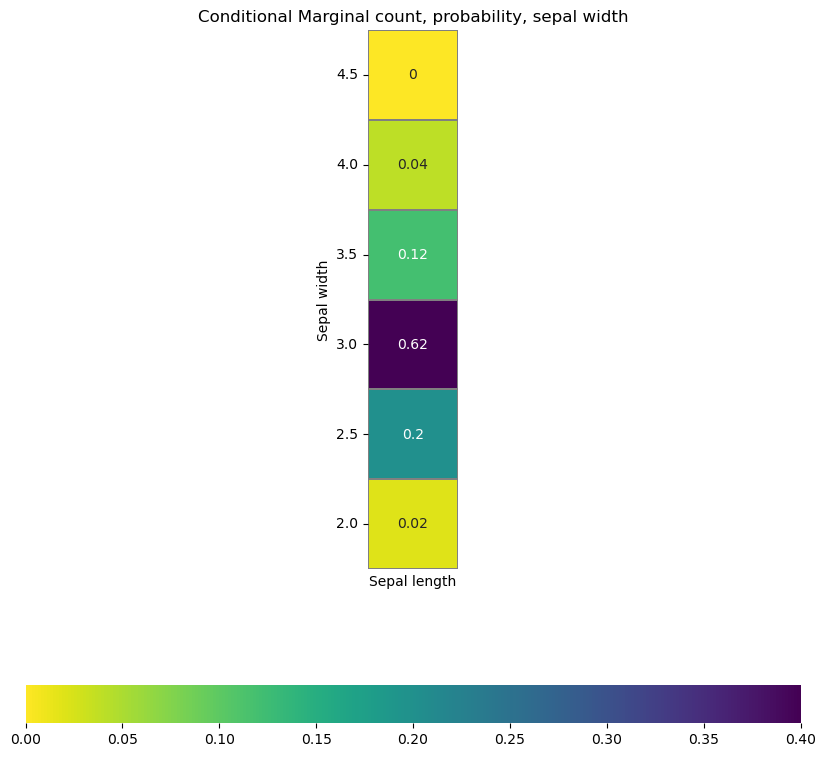

In [32]:
for Given_Y in Y_array:
    print('====================')
    print('Iris class label:')
    print(Given_Y)

    X_df_12_given_Y = X_df[['sepal_length', 'sepal_width', 'species']]
    X_df_12_given_Y['count'] = 1
    X_df_12_given_Y.loc[~(X_df_12_given_Y.species == Given_Y), 'count'] = np.nan
    X_df_12_given_Y = X_df_12_given_Y[['sepal_length', 'sepal_width', 'count']]
    frequency_matrix_given_Y = X_df_12_given_Y.groupby(['sepal_length', 'sepal_width']).count().unstack(level=0)
    frequency_matrix_given_Y.columns = frequency_matrix_given_Y.columns.droplevel(0)
    frequency_matrix_given_Y = frequency_matrix_given_Y.fillna(0).iloc[::-1]
    
    probability_matrix_given_Y = frequency_matrix_given_Y / frequency_matrix_given_Y.sum().sum()

    # 条件边际分布：以花萼长度为条件
    prob_sepal_length_given_Y = probability_matrix_given_Y.sum(axis=0).to_numpy().reshape((1, -1))
    title = 'Conditional Marginal count, probability, sepal length'
    heatmap_sum(prob_sepal_length_given_Y, [], sepal_length_array, title, 0, 0.4, 'viridis_r')

    E_X1_given_Y = prob_sepal_length_given_Y @ sepal_length_array.reshape(-1, 1)
    print('E_X1_given_Y: ' + str(E_X1_given_Y))

    E_X1_sq_given_Y = prob_sepal_length_given_Y @ (sepal_length_array ** 2).reshape(-1, 1)
    print('E_X1_sq_given_Y: ' + str(E_X1_sq_given_Y))

    var_X1_given_Y = E_X1_sq_given_Y - E_X1_given_Y ** 2
    print('var_X1_given_Y: ' + str(var_X1_given_Y))

    std_X1_given_Y = np.sqrt(var_X1_given_Y)
    print('std_X1_given_Y: ' + str(std_X1_given_Y))

    # 条件边际分布：以花萼宽度为条件
    prob_sepal_width_given_Y = probability_matrix_given_Y.sum(axis=1).to_numpy().reshape((-1, 1))
    title = 'Conditional Marginal count, probability, sepal width'
    heatmap_sum(prob_sepal_width_given_Y, sepal_width_array, [], title, 0, 0.4, 'viridis_r')

    E_X2_given_Y = sepal_width_array.reshape(1, -1) @ prob_sepal_width_given_Y
    print('E_X2_given_Y: ' + str(E_X2_given_Y))

    E_X2_sq_given_Y = (sepal_width_array ** 2).reshape(1, -1) @ prob_sepal_width_given_Y
    print('E_X2_sq_given_Y: ' + str(E_X2_sq_given_Y))

    var_X2_given_Y = E_X2_sq_given_Y - E_X2_given_Y ** 2
    print('var_X2_given_Y: ' + str(var_X2_given_Y))

    std_X2_given_Y = np.sqrt(var_X2_given_Y)
    print('std_X2_given_Y: ' + str(std_X2_given_Y))

    print('====================')